In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


In [3]:
df = pd.read_csv('D:\Python\Curso pyhton bootcamp\Predict the Evolution of COVID-19 in Brazil\covid_19_data.csv',parse_dates=['ObservationDate','Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [4]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [5]:
import re 

def corrige_colunas(col_name) :
    return re.sub(r'[/| ]','',col_name).lower()

In [6]:
corrige_colunas('Adge/ ou')

'adgeou'

In [7]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [8]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [9]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [10]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [11]:
df.countryregion.unique()


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [12]:

df.countryregion.value_counts()

US                     4990
Mainland China         3687
Canada                 1093
Australia               788
France                  752
                       ... 
North Ireland             1
Channel Islands           1
Cape Verde                1
Republic of Ireland       1
East Timor                1
Name: countryregion, Length: 223, dtype: int64

In [13]:
brasil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed > 0)]

In [14]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [15]:
px.line(brasil, 'observationdate' ,'confirmed',title='Confirmed cases (Brasil)')

In [16]:
brasil['novoscasos'] = list(map(
    lambda x : 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_14608\3585006547.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [19]:
px.line(brasil,x='observationdate',y='novoscasos',title='Novos casos por dia')

In [23]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.observationdate,y=brasil.deaths,name = 'Mortes',
        mode='lines+markers',line ={'color' : 'red'})
)
fig.update_layout(title='Mortes por Covid-19 no Brasil')
fig.show()



In [30]:
def taxa_crescimento(data,variable,data_inicio=None,data_fim=None):
    if data_inicio == None :
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else :
        data_inicio = pd.to_datetime(data_inicio)

    if data_fim == None :
        data_fim = data.observationdate.iloc[-1]
    else :
        data_fim = pd.to_datetime(data_fim)

    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]

    n = (data_fim - data_inicio).days

    taxa = (presente/passado)**(1/n)-1
    
    return taxa*100


    







In [31]:
taxa_crescimento(brasil,'confirmed')

16.27183353112116

In [34]:
def taxa_crescimento_diaria(data,variable,data_inicio=None,data_fim=None):
    if data_inicio == None :
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else :
        data_inicio = pd.to_datetime(data_inicio)

    data_fim = data.observationdate.max()
    
    n = (data_fim - data_inicio).days

    taxas = list(map(
        lambda x : (data[variable].iloc[x]) - (data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [36]:
tx_dia = taxa_crescimento_diaria(brasil,'confirmed')

In [37]:
tx_dia

array([0.00000e+00, 0.00000e+00, 1.00000e+02, 1.00000e+02, 1.00000e+02,
       1.00000e+02, 3.00000e+02, 3.00000e+02, 1.20000e+03, 1.20000e+03,
       1.90000e+03, 2.40000e+03, 3.00000e+03, 3.70000e+03, 5.10000e+03,
       1.50000e+04, 1.50000e+04, 1.61000e+04, 1.99000e+04, 3.20000e+04,
       3.71000e+04, 6.20000e+04, 7.92000e+04, 1.02000e+05, 1.54500e+05,
       1.92300e+05, 2.24600e+05, 2.55300e+05, 2.98400e+05, 3.41600e+05,
       3.90300e+05, 4.25500e+05, 4.57800e+05, 5.71600e+05, 6.83500e+05,
       8.04300e+05, 9.05500e+05, 1.03590e+06, 1.11290e+06, 1.21600e+06,
       1.40330e+06, 1.61690e+06, 1.80910e+06, 1.96370e+06, 2.07260e+06,
       2.21910e+06, 2.34290e+06, 2.52610e+06, 2.83190e+06, 3.04240e+06,
       3.36810e+06, 3.66570e+06, 3.86530e+06, 4.07420e+06, 4.30780e+06,
       4.57560e+06, 5.00350e+06, 5.40420e+06, 5.93230e+06, 6.30990e+06,
       6.74450e+06, 7.32340e+06, 7.96840e+06, 8.71860e+06, 9.22010e+06,
       9.70990e+06, 1.01825e+07, 1.08619e+07, 1.15454e+07, 1.266

In [40]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil',
       labels={'y':'Taxa de crescimento', 'x':'Data'})


In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


In [46]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [47]:
res = seasonal_decompose(confirmados)

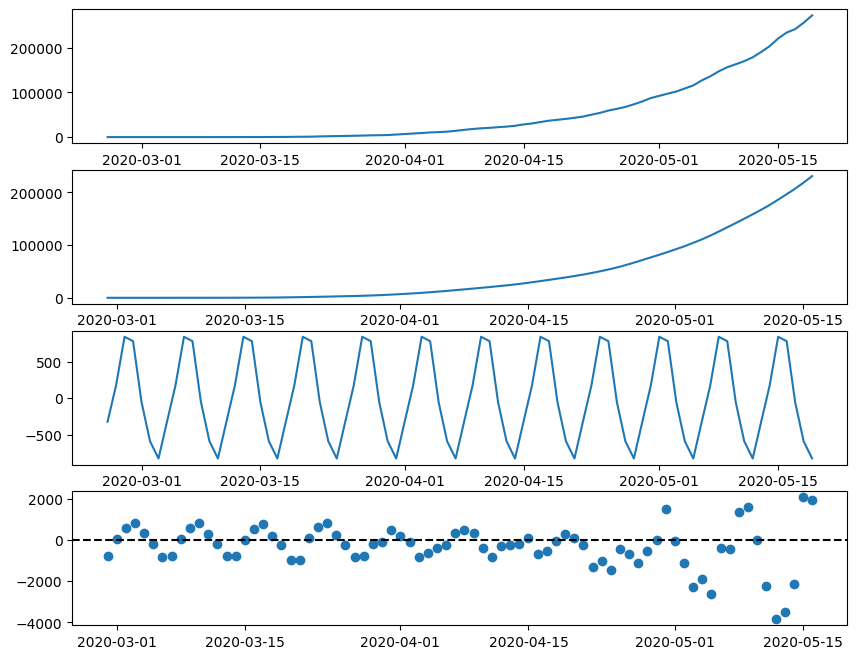

In [48]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()



In [49]:
from pmdarima import auto_arima
modelo = auto_arima(confirmados)

In [52]:
fig = go.Figure(go.Scatter(
    x= confirmados.index, y=confirmados , name ='Observados'
))
fig.add_trace(go.Scatter(
    x= confirmados .index, y=modelo.predict_in_sample(), name = 'Preditos'
) )
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20','2020-06-20'),y=modelo.predict(31),name='Forecast'
))
fig.update_layout(title='Previsão de casos confirmados no Brasil para os Proximos 30 dias')
fig.show()

In [53]:
from fbprophet import prophet

c:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [54]:
train = confirmados.reset_index()[:-5]
test =confirmados.reset_index()[-5:]
train.rename(columns={'observationdate': 'ds','confirmed' : 'y' },inplace = True)
test.rename(columns={'observationdate': 'ds','confirmed' : 'y' },inplace = True)

profeta = prophet(growth='logistic',changepoints=['2020-03-21','2020-03-30','2020-04-25','2020-05-03','2020-05-10'])

pop = 211463256
train['cap'] = pop

future_dates= profeta.make_future_dataframe(periods=200)
future_dates['caps'] = pop
forecast = profeta.predict(future_dates)

TypeError: 'module' object is not callable